In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import xlrd
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:\\Users\\skalk\\census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
#drop unnecessary columns
df=df.drop(columns=["Education"])

In [11]:
#convert the target variable into binary
df["Income"]=df["Income"].apply(lambda x:0 if x=="<=50K" else 1)

In [12]:
#Encode categorical features
cat_features=["Workclass","Marital_status","Occupation","Relationship","Race","Sex","Native_country"]
encoder=LabelEncoder()
for feature in cat_features:
    df[feature]=encoder.fit_transform(df[feature])

In [13]:
#split the data into feature and labels
x=df.drop("Income",axis=1)
y=df["Income"]

In [14]:
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
#scale the numerical features
num_features=["Age","Fnlwgt","Education_num","Capital_gain","Capital_loss","Hours_per_week"]
scaler=StandardScaler()
x_train[num_features]=scaler.fit_transform(x_train[num_features])
x_test[num_features]=scaler.transform(x_test[num_features])

In [17]:
#random forest classifier
clf=RandomForestClassifier(random_state=42)
#hyperparameter tuning
param_grid={
    "n_estimators":[100,200,300],
    "max_depth":[None,5,10],
    "min_samples_split":[2,5,10]
}
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(x_train,y_train)
#get the best hyperparameters
best_params=grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [19]:
#create a ner random forest classifier
best_clf=RandomForestClassifier(random_state=42,**best_params)
#train the model
best_clf.fit(x_train,y_train)
#make prediction
y_pred=best_clf.predict(x_test)

In [20]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

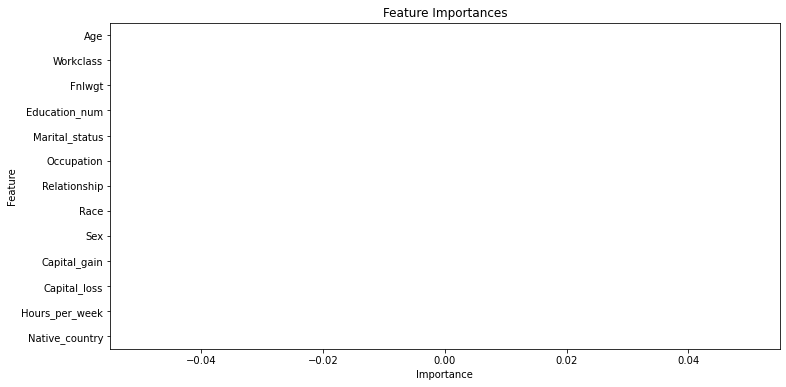

In [22]:
#Calculate feature importances
importances = best_clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({"Feature": x_train.columns, "Importance": importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

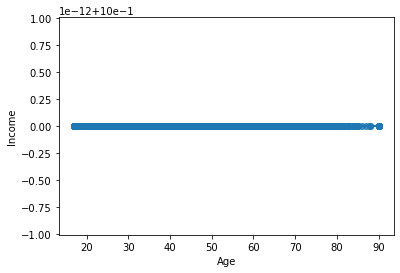

In [23]:
sns.regplot(x='Age',y='Income',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

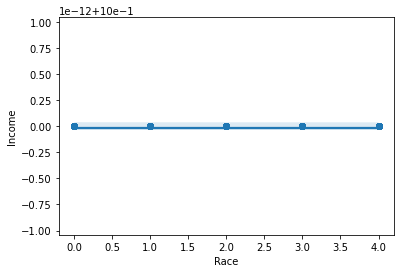

In [24]:
sns.regplot(x='Race',y='Income',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

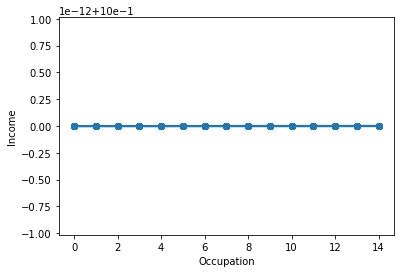

In [25]:
sns.regplot(x='Occupation',y='Income',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

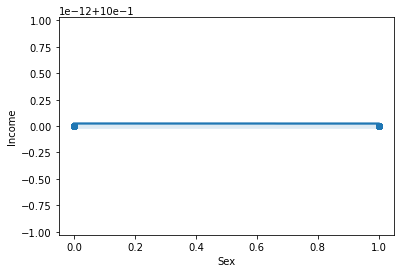

In [26]:
sns.regplot(x='Sex',y='Income',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

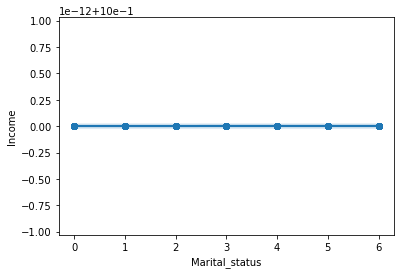

In [28]:
sns.regplot(x='Marital_status',y='Income',data=df)
plt.show